In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import data into csv file

companies_row_pd= pd.read_csv("~/Desktop/uni physics/Year 3/Physics into work/Data City/Lists/Human_Health_Services_2023-01-23_08h41m51s/companieslist_financialsRowLayout_Human_Health_Services.csv")
companies_column_pd=pd.read_csv("~/Desktop/uni physics/Year 3/Physics into work/Data City/Lists/Human_Health_Services_2023-01-23_08h41m51s/companieslist_financialsColumnLayout_Human_Health_Services.csv")

/var/folders/k8/qdkczwt57kvdh59cmc0ccfb40000gn/T/ipykernel_1803/3867540514.py:4: DtypeWarning: Columns (185) have mixed types. Specify dtype option on import or set low_memory=False.
  companies_column_pd=pd.read_csv("~/Desktop/uni physics/Year 3/Physics into work/Data City/Lists/Human_Health_Services_2023-01-23_08h41m51s/companieslist_financialsColumnLayout_Human_Health_Services.csv")


In [3]:
companies_row_pd.columns

Index(['Companynumber', 'Companyname', 'Intrainingset', 'Score',
       'BestEstimateEmployees', 'BestEstimateTurnover',
       'BestEstimateGrowthPercentagePerYear', 'Companycategory',
       'CompanyGrowthStage', 'SortableIncorporationDate', 'IncorporationDate',
       'Description', 'URLs', 'Registeredaddress', 'Registeredpostcode',
       'Telephone', 'Email', 'Sectorkeywords', 'RTICs', 'CICs',
       'RTICsubsectors', 'SICs', 'SICHLUs', 'Countryoforigin', 'OECDcities',
       'Localauthoritycodes', 'Localauthoritynames', 'Constituencies', 'LEPs',
       'NUTS1', 'Postcodes', 'LinkedIn', 'Facebook', 'Twitter', 'Instagram',
       'Youtube', 'TotalDealroomFundingMillionEuros',
       'LastKnownDealroomFunding', 'ParentCompany', 'ParentCompanyNation',
       'UltimateParentCompany', 'UltimateParentCompanyNation',
       'Numberofemployees', 'Yearending', 'Turnover', 'Pretaxprofit',
       'Profitaftertax', 'Cash', 'Totalcurrentassets', 'Totalassets',
       'Totalliabilities', 'Share

In [4]:
#delete useless columns

companies_row_pd=companies_row_pd.drop(columns=['Intrainingset','Description',"URLs",'IncorporationDate','Registeredaddress','Telephone','Email','CICs','UltimateParentCompanyNation','LinkedIn', 'Facebook', 'Twitter', 'Instagram',
       'Youtube'])

In [5]:
companies_row_pd.shape

(72519, 55)

In [6]:
companies_column_pd[companies_column_pd['Companynumber'].duplicated(keep='first')]==True

,Companynumber,Companyname,Intrainingset,Score,BestEstimateEmployees,BestEstimateTurnover,BestEstimateGrowthPercentagePerYear,Companycategory,CompanyGrowthStage,SortableIncorporationDate,...,Bankoverdraft_2022,EBIDTA_2014,EBIDTA_2015,EBIDTA_2016,EBIDTA_2017,EBIDTA_2018,EBIDTA_2019,EBIDTA_2020,EBIDTA_2021,EBIDTA_2022


In [7]:
#replace all nan values with zero in columns which are of type float

columns=companies_row_pd.columns[companies_row_pd.dtypes==float]
for column in columns:
    companies_row_pd[column] = companies_row_pd[column].fillna(0)




In [8]:
columns=companies_column_pd.columns[companies_column_pd.dtypes==float]
for column in columns:
    companies_column_pd[column] = companies_column_pd[column].fillna(0)

- Look at companies and their financials with regards to their company growth stage

In [9]:
#drop rows that have yearending= 0 

companies_row_pd.drop(companies_row_pd[companies_row_pd['Yearending']==0].index,inplace=True)
                               
                             
                               
                               
                               

In [10]:
y=companies_row_pd['Turnover'].groupby(companies_row_pd['Yearending']).sum()
y[:6]

Yearending
2016    5.736797e+10
2017    6.558699e+10
2018    6.731066e+10
2019    6.853040e+10
2020    7.095582e+10
2021    4.497734e+10
Name: Turnover, dtype: float64

In [11]:
a=companies_column_pd['Turnover_2017'].sum()
b=companies_column_pd['Turnover_2018'].sum()
c=companies_column_pd['Turnover_2019'].sum()
d=companies_column_pd['Turnover_2020'].sum()
e=companies_column_pd['Turnover_2021'].sum()

Turnover_2017_2021=np.array([a,b,c,d,e])
Turnover_2017_2021

array([6.55869927e+10, 6.73106598e+10, 6.85303952e+10, 7.09558223e+10,
       4.49773408e+10])

Text(0, 0.5, 'Total Turnover')

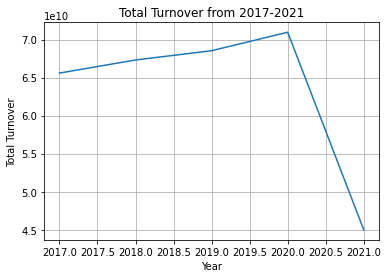

In [12]:
#line plot for the turnover for 2017-2021
fig,ax=plt.subplots()
ax.grid()

sns.lineplot(x=np.arange(2017,2022,1),y=Turnover_2017_2021)
plt.title('Total Turnover from 2017-2021')
plt.xlabel('Year')
plt.ylabel('Total Turnover')

- Total turnover increased steadily from 2017 to 2020 before dropping by approx £30 billion in 2021.

/var/folders/k8/qdkczwt57kvdh59cmc0ccfb40000gn/T/ipykernel_1803/485325996.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df=companies_column_pd.groupby(companies_column_pd['CompanyGrowthStage'])['Turnover_2017','Turnover_2018','Turnover_2019','Turnover_2020','Turnover_2021'].sum()


Text(0, 0.5, 'Total Turnover')

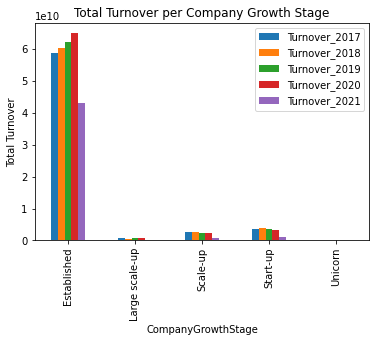

In [13]:
# Time series graph showing total turnover per companygrowthstage


df=companies_column_pd.groupby(companies_column_pd['CompanyGrowthStage'])['Turnover_2017','Turnover_2018','Turnover_2019','Turnover_2020','Turnover_2021'].sum()

df.plot(kind='bar',label=[2017,2018,2019,2020,2021])  
plt.legend()
plt.title('Total Turnover per Company Growth Stage')
plt.ylabel('Total Turnover')






- Established companies make up majority of the turnover in the human helath sevices sector although start-up companies make up over 50% of the sector by company count.

In [14]:
df=df.T

In [15]:
df

CompanyGrowthStage,Established,Large scale-up,Scale-up,Start-up,Unicorn
Turnover_2017,5.878885e+10,619749743.0,2.494771e+09,3.683625e+09,0.0
Turnover_2018,6.020247e+10,545991292.0,2.732117e+09,3.830083e+09,0.0
Turnover_2019,6.210323e+10,680101420.0,2.183481e+09,3.563583e+09,0.0
Turnover_2020,6.494254e+10,686257203.0,2.198668e+09,3.128357e+09,0.0
Turnover_2021,4.298726e+10,285077607.0,7.368078e+08,9.681990e+08,0.0


Text(0.5, 0, 'Year')

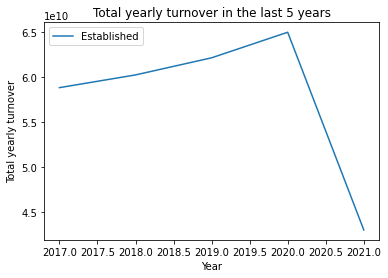

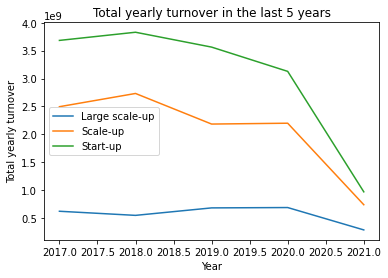

In [16]:
sns.lineplot(x=np.arange(2017,2022,1),y=df['Established'],label='Established')
plt.ylabel('Total yearly turnover')
plt.xlabel('Year')
plt.title('Total yearly turnover in the last 5 years')
plt.figure()
sns.lineplot(x=np.arange(2017,2022,1),y=df['Large scale-up'],label='Large scale-up')
sns.lineplot(x=np.arange(2017,2022,1),y=df['Scale-up'],label='Scale-up')
sns.lineplot(x=np.arange(2017,2022,1),y=df['Start-up'],label='Start-up') 
plt.legend()
plt.title('Total yearly turnover in the last 5 years')
plt.ylabel('Total yearly turnover')
plt.xlabel('Year')

1. Turnover for the established companies in this sector increased steadily until 2020 until there was a massive drop off in 2021.
2. For start-Up and Scale -up companies the turnover has been steadily decreasing up until 2021 when the decrease exasperated.
3. For large scale up companies, yearly turnover was steady until a slight drop off in 2021.

- What is the distribution between the company growth stage and the turnover?

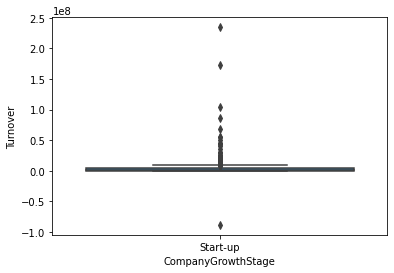

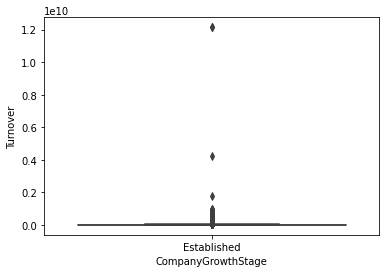

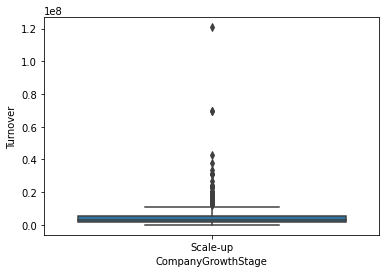

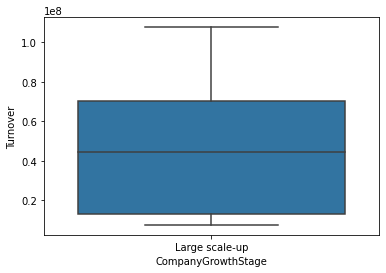

In [17]:
# plot a box plot of the company growth stage and the turnover in 2020
#for each company. As 2021 only shows around 6000 companies that have their turnover registered;not representative.
# A large proprotion of the turnover = 0 so omitted from this plot.


Turnover_Yearending_df=companies_row_pd.loc[:,['Companyname','Turnover','Yearending','CompanyGrowthStage']]
Turnover_Yearending_df[(Turnover_Yearending_df['Yearending']==2020) & (Turnover_Yearending_df['CompanyGrowthStage']=='Start-up')]

for i in companies_row_pd['CompanyGrowthStage'].unique()[:4]:
    sns.boxplot(x=Turnover_Yearending_df['CompanyGrowthStage'][(Turnover_Yearending_df['Yearending']==2020) & 
                                                               (Turnover_Yearending_df['CompanyGrowthStage']==i) &
                                                               (Turnover_Yearending_df['Turnover']!=0)],
           y=Turnover_Yearending_df['Turnover'])
    plt.show()
            

1. According to the yearly turnover in 2020, the distribution in the human health services sector is negatively skewed for each company growth stage with the only exception being Large scale up companies. This shows that only a few companies representing each company growth stage contribute to most of the total turnover.

In [18]:
Turnover_Yearending_df['Turnover'][(Turnover_Yearending_df['Yearending']==2020) & 
                                                               (Turnover_Yearending_df['CompanyGrowthStage']) &
                                                               (Turnover_Yearending_df['Turnover']!=0)].groupby(Turnover_Yearending_df['CompanyGrowthStage']).median()

CompanyGrowthStage
Established        8613926.0
Large scale-up    44641062.0
Scale-up           2958398.0
Start-up            552988.0
Name: Turnover, dtype: float64

In [19]:
Turnover_Yearending_df['Turnover'][(Turnover_Yearending_df['Yearending']==2020) & 
                                                               (Turnover_Yearending_df['CompanyGrowthStage']) &
                                                               (Turnover_Yearending_df['Turnover']!=0)].groupby(Turnover_Yearending_df['CompanyGrowthStage']).mean()

CompanyGrowthStage
Established       6.298985e+07
Large scale-up    4.575048e+07
Scale-up          5.510446e+06
Start-up          3.503200e+06
Name: Turnover, dtype: float64

- Looking at more geographical approaches to the data
    - How is the yearly turnover from 2017-2021 distributed within the UK?
    


In [20]:
# Get dataframe of the yearly turnover and the geogrpahical location to export into tableau


turnover_geography_df=companies_column_pd.iloc[:,[1,8,26,29,54,55,56,57,58]]
turnover_geography_df.head()

,Companyname,CompanyGrowthStage,Localauthoritynames,NUTS1,Turnover_2017,Turnover_2018,Turnover_2019,Turnover_2020,Turnover_2021
0,ALCI LTD,Start-up,Bromley,London,0.0,0.0,0.0,0.0,0.0
1,COLIN WHITE (PROPERTY) LIMITED,Start-up,Elmbridge,South East (England),0.0,0.0,0.0,0.0,0.0
2,CHI HEALTH AND CARE LTD,Start-up,Newham,London,0.0,0.0,0.0,0.0,0.0
3,CARTESIAN SOLUTIONS LTD,Start-up,Cheltenham,South West (England),0.0,0.0,0.0,0.0,0.0
4,THE HEALTH FOUNDATION,Established,"Eastbourne,Southampton,Glasgow City,City of Lo...","South East (England),Scotland,London",14890000.0,15135000.0,16114000.0,16378000.0,17060000.0


In [21]:
for i in turnover_geography_df['NUTS1'].iloc[:5]:
    print(i)

London
South East (England)
London
South West (England)
South East (England),Scotland,London


In [22]:
# Some companies have daughter offices located in other parts of the UK, the location in which 
#  the company registered their address will count as their location which is the last region 
#in the list specified in the NUTS1 column


def split_by_comma(x):
    if ',' in str(x):
        return x.split(',',-1)[-1]
    return [x]

turnover_geography_df['NUTS1']=turnover_geography_df['NUTS1'].apply(lambda x:pd.Series(split_by_comma(x)))
turnover_geography_df['NUTS1']=turnover_geography_df['NUTS1'].stack().reset_index(drop=True)





/var/folders/k8/qdkczwt57kvdh59cmc0ccfb40000gn/T/ipykernel_1803/430745796.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnover_geography_df['NUTS1']=turnover_geography_df['NUTS1'].apply(lambda x:pd.Series(split_by_comma(x)))


AttributeError: 'Series' object has no attribute 'stack'

In [26]:
turnover_geography_df['NUTS1'].shape

(19811,)

In [27]:
#Can drop empty values as location cannot be inferrred from anywhere else and small in proportion.
#Includes companies that probs dont have a website.
turnover_geography_df['NUTS1'].isna().sum()
                              

115

In [28]:
def split_by_comma(x):
    if ',' in str(x):
        return x.split(',',-1)[-1]
    return [x]

turnover_geography_df['Localauthoritynames']=turnover_geography_df['Localauthoritynames'].apply(lambda x:pd.Series(split_by_comma(x)))
turnover_geography_df['Localauthoritynames']=turnover_geography_df['Localauthoritynames'].stack().reset_index(drop=True)

/var/folders/k8/qdkczwt57kvdh59cmc0ccfb40000gn/T/ipykernel_1803/2004780335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnover_geography_df['Localauthoritynames']=turnover_geography_df['Localauthoritynames'].apply(lambda x:pd.Series(split_by_comma(x)))


AttributeError: 'Series' object has no attribute 'stack'

In [44]:
turnover_geography_df.head()

,Companyname,CompanyGrowthStage,Localauthoritynames,NUTS1,Turnover_2017,Turnover_2018,Turnover_2019,Turnover_2020,Turnover_2021
0,ALCI LTD,Start-up,Bromley,London,0.0,0.0,0.0,0.0,0.0
1,COLIN WHITE (PROPERTY) LIMITED,Start-up,Elmbridge,South East (England),0.0,0.0,0.0,0.0,0.0
2,CHI HEALTH AND CARE LTD,Start-up,Newham,London,0.0,0.0,0.0,0.0,0.0
3,CARTESIAN SOLUTIONS LTD,Start-up,Cheltenham,South West (England),0.0,0.0,0.0,0.0,0.0
4,THE HEALTH FOUNDATION,Established,City of London,London,14890000.0,15135000.0,16114000.0,16378000.0,17060000.0


In [45]:
#save as csv
turnover_geography_df.to_csv('turnover_geography_df.csv')

In [46]:
#do the same for the row layout dataframe

In [47]:
turnover_geography_row_df=companies_row_pd.loc[:,['Companyname','CompanyGrowthStage','NUTS1','Localauthoritynames','Yearending','Turnover',]]
                                               
turnover_geography_row_df.head(10)                                           
                                               
                                               

,Companyname,CompanyGrowthStage,NUTS1,Localauthoritynames,Yearending,Turnover
1,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2016,0.0
2,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2017,0.0
3,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2018,0.0
4,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2019,0.0
5,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2020,0.0
6,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2021,0.0
8,CARTESIAN SOLUTIONS LTD,Start-up,South West (England),Cheltenham,2019,0.0
9,CARTESIAN SOLUTIONS LTD,Start-up,South West (England),Cheltenham,2020,0.0
10,THE HEALTH FOUNDATION,Established,"South East (England),Scotland,London","Eastbourne,Southampton,Glasgow City,City of Lo...",2016,14939000.0
11,THE HEALTH FOUNDATION,Established,"South East (England),Scotland,London","Eastbourne,Southampton,Glasgow City,City of Lo...",2017,14890000.0


In [48]:
turnover_geography_row_df.groupby('NUTS1')['Companyname'].nunique()

NUTS1
East                                                                                                                   1191
East Midlands (England)                                                                                                 837
East Midlands (England),East                                                                                             32
East Midlands (England),East,London                                                                                       2
East Midlands (England),East,North East (England)                                                                         1
                                                                                                                       ... 
Yorkshire and The Humber,West Midlands (England)                                                                         11
Yorkshire and The Humber,West Midlands (England),East,London,Scotland,South East (England),Wales                          2
Yo

In [49]:
def split_by_comma(x):
    if ',' in str(x):
        return x.split(',',-1)[-1]
    return [x]

turnover_geography_row_df['NUTS1']=turnover_geography_row_df['NUTS1'].apply(lambda x:pd.Series(split_by_comma(x)))
turnover_geography_row_df['NUTS1']=turnover_geography_row_df['NUTS1'].stack().reset_index(drop=True)





AttributeError: 'Series' object has no attribute 'stack'

In [50]:
# Look at Local authority names
for i in turnover_geography_row_df['Localauthoritynames'].iloc[:5]:
    print(i)

Elmbridge
Elmbridge
Elmbridge
Elmbridge
Elmbridge


In [51]:
def split_by_comma(x):
    if ',' in str(x):
        return x.split(',',-1)[-1]
    return [x]

turnover_geography_row_df['Localauthoritynames']=turnover_geography_row_df['Localauthoritynames'].apply(lambda x:pd.Series(split_by_comma(x)))
turnover_geography_row_df['Localauthoritynames']=turnover_geography_row_df['Localauthoritynames'].stack().reset_index(drop=True)





AttributeError: 'Series' object has no attribute 'stack'

In [54]:
# drop row
yearending_drop=turnover_geography_row_df[turnover_geography_row_df['Yearending']==0].index
turnover_geography_row_df.drop(yearending_drop,inplace=True,axis=0)

In [55]:
turnover_geography_row_df.head(50)

,Companyname,CompanyGrowthStage,NUTS1,Localauthoritynames,Yearending,Turnover
1,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2016,0.0
2,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2017,0.0
3,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2018,0.0
4,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2019,0.0
5,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2020,0.0
6,COLIN WHITE (PROPERTY) LIMITED,Start-up,South East (England),Elmbridge,2021,0.0
8,CARTESIAN SOLUTIONS LTD,Start-up,South West (England),Cheltenham,2019,0.0
9,CARTESIAN SOLUTIONS LTD,Start-up,South West (England),Cheltenham,2020,0.0
10,THE HEALTH FOUNDATION,Established,London,City of London,2016,14939000.0
11,THE HEALTH FOUNDATION,Established,London,City of London,2017,14890000.0


In [56]:
turnover_geography_row_df.to_csv('turnover_geography_row_df.csv')

- Look at the total equity (assets- liabilites) of this sector over last 5 years

In [57]:
equity_row_df= companies_row_pd.loc[:,['CompanyGrowthStage','NUTS1','Yearending','Totalassets','Totalliabilities']]

In [58]:
equity_row_df.head()

,CompanyGrowthStage,NUTS1,Yearending,Totalassets,Totalliabilities
1,Start-up,South East (England),2016,221076.0,219089.0
2,Start-up,South East (England),2017,230870.0,216426.0
3,Start-up,South East (England),2018,565156.0,556342.0
4,Start-up,South East (England),2019,581141.0,553993.0
5,Start-up,South East (England),2020,1085115.0,989255.0


In [59]:
equity_row_df['total_equity']=equity_row_df['Totalassets']-equity_row_df['Totalliabilities']

In [60]:
#save and export to tableau
equity_row_df.to_csv('equity_row_df.csv')

In [61]:
def split_by_comma(x):
    if ',' in str(x):
        return x.split(',',-1)[-1]
    return [x]

companies_column_pd['NUTS1']=companies_column_pd['NUTS1'].apply(lambda x:pd.Series(split_by_comma(x)))
companies_column_pd['NUTS1']=companies_column_pd['NUTS1'].stack().reset_index(drop=True)





AttributeError: 'Series' object has no attribute 'stack'

In [62]:
equity_column_df=companies_column_pd.loc[:,['CompanyGrowthStage','NUTS1','Totalassets_2017','Totalassets_2018','Totalassets_2019','Totalassets_2020','Totalassets_2021','Totalliabilities_2017','Totalliabilities_2018','Totalliabilities_2019','Totalliabilities_2020','Totalliabilities_2021']]
                                     
                                     
                                     
                                     
                                     

In [63]:
equity_column_df.head()

,CompanyGrowthStage,NUTS1,Totalassets_2017,Totalassets_2018,Totalassets_2019,Totalassets_2020,Totalassets_2021,Totalliabilities_2017,Totalliabilities_2018,Totalliabilities_2019,Totalliabilities_2020,Totalliabilities_2021
0,Start-up,London,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,Start-up,South East (England),2.308700e+05,565156.0,5.811410e+05,1.085115e+06,1.210470e+06,216426.0,556342.0,553993.0,989255.0,994970.0
2,Start-up,London,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
3,Start-up,South West (England),0.000000e+00,0.0,3.853000e+03,1.200500e+04,0.000000e+00,0.0,0.0,5459.0,11561.0,0.0
4,Established,London,1.048235e+09,990460000.0,1.090436e+09,1.141380e+09,1.245212e+09,39445000.0,39194000.0,36516000.0,34775000.0,25850000.0


In [64]:
equity_column_df['Total_equity_2017']=equity_column_df['Totalassets_2017']-equity_column_df['Totalliabilities_2017']
equity_column_df['Total_equity_2018']=equity_column_df['Totalassets_2018']-equity_column_df['Totalliabilities_2018']
equity_column_df['Total_equity_2019']=equity_column_df['Totalassets_2019']-equity_column_df['Totalliabilities_2019']
equity_column_df['Total_equity_2020']=equity_column_df['Totalassets_2020']-equity_column_df['Totalliabilities_2020']
equity_column_df['Total_equity_2021']=equity_column_df['Totalassets_2021']-equity_column_df['Totalliabilities_2021']
    

       

     

    

    

In [65]:
equity_column_df.head()

,CompanyGrowthStage,NUTS1,Totalassets_2017,Totalassets_2018,Totalassets_2019,Totalassets_2020,Totalassets_2021,Totalliabilities_2017,Totalliabilities_2018,Totalliabilities_2019,Totalliabilities_2020,Totalliabilities_2021,Total_equity_2017,Total_equity_2018,Total_equity_2019,Total_equity_2020,Total_equity_2021
0,Start-up,London,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
1,Start-up,South East (England),2.308700e+05,565156.0,5.811410e+05,1.085115e+06,1.210470e+06,216426.0,556342.0,553993.0,989255.0,994970.0,1.444400e+04,8814.0,2.714800e+04,9.586000e+04,2.155000e+05
2,Start-up,London,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
3,Start-up,South West (England),0.000000e+00,0.0,3.853000e+03,1.200500e+04,0.000000e+00,0.0,0.0,5459.0,11561.0,0.0,0.000000e+00,0.0,-1.606000e+03,4.440000e+02,0.000000e+00
4,Established,London,1.048235e+09,990460000.0,1.090436e+09,1.141380e+09,1.245212e+09,39445000.0,39194000.0,36516000.0,34775000.0,25850000.0,1.008790e+09,951266000.0,1.053920e+09,1.106605e+09,1.219362e+09


In [66]:
#save and export to tableau

equity_column_df.to_csv('equity_column_df.csv')

In [67]:
# Look at current Ratio for 2021 = current assets/current liabilities

financial_performance_column_df=companies_column_pd.loc[:,['Companyname','CompanyGrowthStage','Totalcurrentassets_2021','Totalcurrentliabilities_2021','Totalassets_2021','Totalliabilities_2021']]




financial_performance_column_df.head()

,Companyname,CompanyGrowthStage,Totalcurrentassets_2021,Totalcurrentliabilities_2021,Totalassets_2021,Totalliabilities_2021
0,ALCI LTD,Start-up,0.0,0.0,0.000000e+00,0.0
1,COLIN WHITE (PROPERTY) LIMITED,Start-up,43470.0,745018.0,1.210470e+06,994970.0
2,CHI HEALTH AND CARE LTD,Start-up,0.0,0.0,0.000000e+00,0.0
3,CARTESIAN SOLUTIONS LTD,Start-up,0.0,0.0,0.000000e+00,0.0
4,THE HEALTH FOUNDATION,Established,7161000.0,20055000.0,1.245212e+09,25850000.0


In [68]:
financial_performance_column_df['Total_equity_2021']=financial_performance_column_df['Totalassets_2021']-financial_performance_column_df['Totalliabilities_2021']

In [69]:
financial_performance_column_df.head()

,Companyname,CompanyGrowthStage,Totalcurrentassets_2021,Totalcurrentliabilities_2021,Totalassets_2021,Totalliabilities_2021,Total_equity_2021
0,ALCI LTD,Start-up,0.0,0.0,0.000000e+00,0.0,0.000000e+00
1,COLIN WHITE (PROPERTY) LIMITED,Start-up,43470.0,745018.0,1.210470e+06,994970.0,2.155000e+05
2,CHI HEALTH AND CARE LTD,Start-up,0.0,0.0,0.000000e+00,0.0,0.000000e+00
3,CARTESIAN SOLUTIONS LTD,Start-up,0.0,0.0,0.000000e+00,0.0,0.000000e+00
4,THE HEALTH FOUNDATION,Established,7161000.0,20055000.0,1.245212e+09,25850000.0,1.219362e+09


In [70]:
#fill all null values with zero which are of type float

columns=financial_performance_column_df.columns[financial_performance_column_df.dtypes==float]
for column in columns:
    financial_performance_column_df[column] = financial_performance_column_df[column].fillna(0)

In [71]:
#calculate current ratio
financial_performance_column_df['current_ratio_2021']=financial_performance_column_df['Totalcurrentassets_2021']/financial_performance_column_df['Totalcurrentliabilities_2021']







In [72]:
# drop rows for current ratio values which are NaN.Although there are a lot of these (14k)
financial_performance_column_df.isna().sum()
financial_performance_column_df.dropna(inplace=True)
financial_performance_column_df.shape

(5680, 8)

In [73]:
financial_performance_column_df['current_ratio_2021'].value_counts()


inf         895
0.000000    116
1.000000     30
2.509427      2
0.250000      2
           ... 
1.020427      1
0.606099      1
2.506735      1
1.065379      1
3.025579      1
Name: current_ratio_2021, Length: 4639, dtype: int64

In [74]:
#calculate D/E ratio= total liabilities/total equity

financial_performance_column_df['D/E_ratio']=financial_performance_column_df['Totalliabilities_2021']/financial_performance_column_df['Total_equity_2021']

In [75]:
#save and export to tableau

financial_performance_column_df.to_csv('financial_performance_column_df.csv')

In [80]:
turnover_geography_row_df[turnover_geography_row_df['Localauthoritynames']=='Test Valley'].head(50)

,Companyname,CompanyGrowthStage,NUTS1,Localauthoritynames,Yearending,Turnover
7900,HEALTH SCREENING DORSET LIMITED,Start-up,South East (England),Test Valley,2016,0.0
7901,HEALTH SCREENING DORSET LIMITED,Start-up,South East (England),Test Valley,2017,0.0
7902,HEALTH SCREENING DORSET LIMITED,Start-up,South East (England),Test Valley,2018,0.0
7903,HEALTH SCREENING DORSET LIMITED,Start-up,South East (England),Test Valley,2019,0.0
7904,HEALTH SCREENING DORSET LIMITED,Start-up,South East (England),Test Valley,2020,0.0
9785,AMOR CARE LIMITED,Start-up,South East (England),Test Valley,2017,0.0
9786,AMOR CARE LIMITED,Start-up,South East (England),Test Valley,2018,0.0
9787,AMOR CARE LIMITED,Start-up,South East (England),Test Valley,2019,0.0
9788,AMOR CARE LIMITED,Start-up,South East (England),Test Valley,2020,0.0
11715,INFINITY CARE LIMITED,Start-up,South East (England),Test Valley,2016,0.0
